# API Demos

The following cells demonstrate fitting ITC experiments using the `pytc` API.  The demos are arranged (roughly) from simpler to more complex fits.  The examples use ITC data in the `pytc/demos` directory.  

In [1]:
%matplotlib inline

## Fit single-site binding curves for experiments at four temperatures to determine van't Hoff enthalpy and/or heat capacity
 + Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $25$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 
 + Constrain the baselines and give a single fraction competent across all experiments.

### Fit to a Van't Hoff model assuming constant $\Delta H$

# Fit successful? False
# Fit sum of square residuals: 292.1083710105065
# Fit num param: 12
# Fit num observations: 52
# Fit num degrees freedom: 40
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,vh_dCp,NA,-6.71789e+01,3.03854e-01,float,1.00000e+00,-inf,inf
global,g_competent,NA,1.20000e+00,6.28213e+00,float,1.00000e+00,8.00000e-01,1.20000e+00
global,vh_dH_ref,NA,-3.29619e+03,1.76873e-01,float,1.00000e+00,-inf,inf
global,vh_K_ref,NA,1.47951e+03,9.18835e-02,float,1.00000e+02,-inf,inf
local,dilution_intercept,demos/temp-dependence/5C.DH,-1.34321e+01,3.97362e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,demos/temp-dependence/5C.DH,1.74808e+03,6.03652e-02,float,0.00000e+00,-inf,inf
local,dilution_intercept,demos/temp-dependence/10C.DH,-2.73115e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,demos/temp-dependence/10C.DH,1.31524e+03,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,demos/temp-dependence/25C.DH,4.15273e+00,0.0

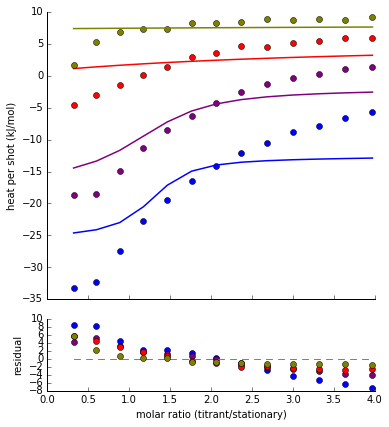

In [13]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.global_models.GlobalFit()
vh = pytc.global_models.VantHoffExtended("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("demos/temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g.add_experiment(t5)
g.link_to_global(t5,"dH",vh.dH)
g.link_to_global(t5,"K",vh.K)
#g.link_to_global(t5,"dilution_heat","t5_heat")
#g.link_to_global(t5,"dilution_intercept","t5_intercept")
g.link_to_global(t5,"fx_competent","g_competent")

#t5_blank = pytc.ITCExperiment("demos/temp-dependence/5C.DH",pytc.indiv_models.Blank,shot_start=10)
#g.add_experiment(t5_blank,weight=100)
#g.link_to_global(t5_blank,"dilution_heat","t5_heat")
#g.link_to_global(t5_blank,"dilution_intercept","t5_intercept")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("demos/temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g.add_experiment(t10)
g.link_to_global(t10,"dH",vh.dH)
g.link_to_global(t10,"K",vh.K)
#g.link_to_global(t10,"dilution_heat","t10_heat")
#g.link_to_global(t10,"dilution_intercept","t10_intercept")
g.link_to_global(t10,"fx_competent","g_competent")

#t10_blank = pytc.ITCExperiment("demos/temp-dependence/10C.DH",pytc.indiv_models.Blank,shot_start=10)
#g.add_experiment(t10_blank,weight=100)
#g.link_to_global(t10_blank,"dilution_heat","t10_heat")
#g.link_to_global(t10_blank,"dilution_intercept","t10_intercept")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("demos/temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g.add_experiment(t25)
g.link_to_global(t25,"dH",vh.dH)
g.link_to_global(t25,"K",vh.K)
#g.link_to_global(t25,"dilution_heat","t25_heat")
#g.link_to_global(t25,"dilution_intercept","t25_intercept")
g.link_to_global(t25,"fx_competent","g_competent")

#t25_blank = pytc.ITCExperiment("demos/temp-dependence/25C.DH",pytc.indiv_models.Blank,shot_start=10)
#g.add_experiment(t25_blank,weight=100)
#g.link_to_global(t25_blank,"dilution_heat","t25_heat")
#g.link_to_global(t25_blank,"dilution_intercept","t25_intercept")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("demos/temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g.add_experiment(t35)
g.link_to_global(t35,"dH",vh.dH)
g.link_to_global(t35,"K",vh.K)
g.link_to_global(t35,"fx_competent","g_competent")
#g.link_to_global(t35,"dilution_heat","t35_heat")
#g.link_to_global(t35,"dilution_intercept","t35_intercept")

#t35_blank = pytc.ITCExperiment("demos/temp-dependence/35C.DH",pytc.indiv_models.Blank,shot_start=10)
#g.add_experiment(t35_blank,weight=100)
#g.link_to_global(t35_blank,"dilution_heat","t35_heat")
#g.link_to_global(t35_blank,"dilution_intercept","t35_intercept")


g.update_bounds("g_competent",(0.80,1.2))
g.update_guess("vh_K_ref",100)

# Do fit
g.fit()

# Show the results
fit, ax = g.plot()
print(g.fit_as_csv)


STUFF

# Fit successful? True
# Fit sum of square residuals: 729.0388049841821
# Fit num param: 12
# Fit num observations: 68
# Fit num degrees freedom: 56
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,g_competent,NA,1.05884e+00,7.23460e+00,float,1.00000e+00,8.00000e-01,1.20000e+00
global,t5_intercept,NA,-2.09137e+01,5.24508e+00,float,0.00000e+00,-inf,inf
global,t35_heat,NA,4.08935e+03,0.00000e+00,float,0.00000e+00,-inf,inf
global,t10_heat,NA,2.45038e+04,0.00000e+00,float,0.00000e+00,-inf,inf
global,t25_intercept,NA,2.31590e+00,0.00000e+00,float,0.00000e+00,-inf,inf
global,vh_K_ref,NA,4.01260e+03,3.29203e-02,float,1.00000e+02,-inf,inf
global,vh_dH_ref,NA,-3.45452e+03,4.14516e-02,float,1.00000e+00,-inf,inf
global,vh_dCp,NA,-4.24571e+01,7.22447e-01,float,1.00000e+00,-inf,inf
global,t35_intercept,NA,7.60614e+00,0.00000e+00,float,0.00000e+00,-inf,inf
global,t25_heat,NA,1.01804e+04,0.00000e+00,float,0.00000e+00,-inf,inf
global,t10_intercept,NA,-7.29133e+00,0.00000e

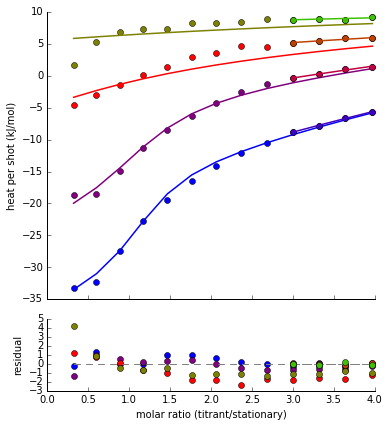

In [8]:

# --------------------------------------------------------------------
# Create a global fitting instance
h = pytc.global_models.GlobalFit()
vhe = pytc.global_models.VantHoffExtended("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("demos/temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1)
h.add_experiment(t5)
h.link_to_global(t5,"dH",vhe.dH)
h.link_to_global(t5,"K",vhe.K)
h.link_to_global(t5,"dilution_heat","t5_heat")
h.link_to_global(t5,"dilution_intercept","t5_intercept")
h.link_to_global(t5,"fx_competent","g_competent")

#t5_blank = pytc.ITCExperiment("demos/temp-dependence/5C.DH",pytc.indiv_models.Blank,shot_start=10)
h.add_experiment(t5_blank,weight=100)
h.link_to_global(t5_blank,"dilution_heat","t5_heat")
h.link_to_global(t5_blank,"dilution_intercept","t5_intercept")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("demos/temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1)
h.add_experiment(t10)
h.link_to_global(t10,"dH",vhe.dH)
h.link_to_global(t10,"K",vhe.K)
h.link_to_global(t10,"dilution_heat","t10_heat")
h.link_to_global(t10,"dilution_intercept","t10_intercept")
h.link_to_global(t10,"fx_competent","g_competent")

t10_blank = pytc.ITCExperiment("demos/temp-dependence/10C.DH",pytc.indiv_models.Blank,shot_start=10)
h.add_experiment(t10_blank,weight=100)
h.link_to_global(t10_blank,"dilution_heat","t10_heat")
h.link_to_global(t10_blank,"dilution_intercept","t10_intercept")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("demos/temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1)
h.add_experiment(t25)
h.link_to_global(t25,"dH",vhe.dH)
h.link_to_global(t25,"K",vhe.K)
h.link_to_global(t25,"dilution_heat","t25_heat")
h.link_to_global(t25,"dilution_intercept","t25_intercept")
h.link_to_global(t25,"fx_competent","g_competent")

t25_blank = pytc.ITCExperiment("demos/temp-dependence/25C.DH",pytc.indiv_models.Blank,shot_start=10)
h.add_experiment(t25_blank,weight=100)
h.link_to_global(t25_blank,"dilution_heat","t25_heat")
h.link_to_global(t25_blank,"dilution_intercept","t25_intercept")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("demos/temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1)
h.add_experiment(t35)
h.link_to_global(t35,"dH",vhe.dH)
h.link_to_global(t35,"K",vhe.K)
h.link_to_global(t35,"fx_competent","g_competent")
h.link_to_global(t35,"dilution_heat","t35_heat")
h.link_to_global(t35,"dilution_intercept","t35_intercept")

t35_blank = pytc.ITCExperiment("demos/temp-dependence/35C.DH",pytc.indiv_models.Blank,shot_start=10)
h.add_experiment(t35_blank,weight=100)
h.link_to_global(t35_blank,"dilution_heat","t35_heat")
h.link_to_global(t35_blank,"dilution_intercept","t35_intercept")


h.update_bounds("g_competent",(0.80,1.2))
h.update_guess("vh_K_ref",100)

# Do fit
h.fit()

# Show the results
fit, ax = h.plot()
print(h.fit_as_csv)


## Use an F-test to decide whether or not additionof dCp is justified.

Using fit already done for model 1.

Model 1 fit
# Fit successful? True
# Fit sum of square residuals: 797.2912076619725
# Fit num param: 11
# Fit num observations: 68
# Fit num degrees freedom: 57
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,g_competent,NA,8.00000e-01,0.00000e+00,float,1.00000e+00,8.00000e-01,1.20000e+00
global,t5_intercept,NA,-2.09394e+01,5.38446e+01,float,0.00000e+00,-inf,inf
global,t35_heat,NA,3.90857e+03,0.00000e+00,float,0.00000e+00,-inf,inf
global,t35_intercept,NA,7.66481e+00,0.00000e+00,float,0.00000e+00,-inf,inf
global,t25_heat,NA,1.01146e+04,0.00000e+00,float,0.00000e+00,-inf,inf
global,t10_heat,NA,2.45821e+04,0.00000e+00,float,0.00000e+00,-inf,inf
global,t25_intercept,NA,2.33713e+00,0.00000e+00,float,0.00000e+00,-inf,inf
global,t5_heat,NA,4.26960e+04,0.00000e+00,float,0.00000e+00,-inf,inf
global,vh_dH_vanthoff,NA,-3.39148e+03,0.00000e+00,float,1.00000e+00,-inf,inf
global,t10_intercept,NA,-7.31673e+00,0.00000e+00,float,0.0000

(True, 1.1102230246251565e-16)

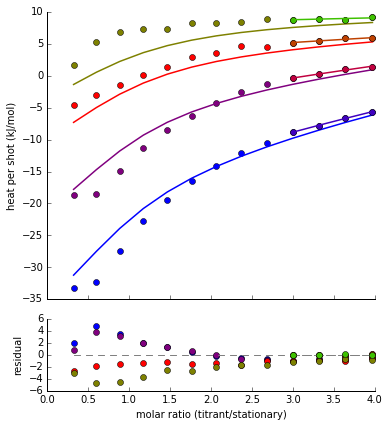

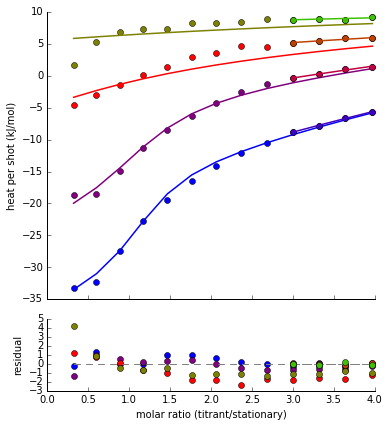

In [9]:
import pytc
from pytc import util

util.choose_model(g,h,alpha=0.05)
